# 1. Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_excel('Detroit.xlsx')
df.head()


,City,Country,Latitude,Longitude,datetime,Humidity,Pressure,Temperature,Weather Description,Wind Direction,Wind Speed
0,Detroit,United States,42.331429,-83.045753,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,Detroit,United States,42.331429,-83.045753,2012-10-01 13:00:00,76.0,1016.0,284.030000,sky is clear,0.0,0.0
2,Detroit,United States,42.331429,-83.045753,2012-10-01 14:00:00,75.0,1015.0,284.069789,sky is clear,0.0,0.0
3,Detroit,United States,42.331429,-83.045753,2012-10-01 15:00:00,75.0,1015.0,284.173965,sky is clear,0.0,0.0
4,Detroit,United States,42.331429,-83.045753,2012-10-01 16:00:00,74.0,1015.0,284.278140,sky is clear,0.0,0.0


In [2]:
df.tail()

,City,Country,Latitude,Longitude,datetime,Humidity,Pressure,Temperature,Weather Description,Wind Direction,Wind Speed
45248,Detroit,United States,42.331429,-83.045753,2017-11-29 20:00:00,39.0,1027.0,281.25,sky is clear,50.0,1.0
45249,Detroit,United States,42.331429,-83.045753,2017-11-29 21:00:00,39.0,1027.0,281.05,sky is clear,70.0,2.0
45250,Detroit,United States,42.331429,-83.045753,2017-11-29 22:00:00,42.0,1027.0,280.17,sky is clear,90.0,3.0
45251,Detroit,United States,42.331429,-83.045753,2017-11-29 23:00:00,52.0,1027.0,278.06,sky is clear,110.0,1.0
45252,Detroit,United States,42.331429,-83.045753,2017-11-30 00:00:00,56.0,1027.0,276.59,sky is clear,100.0,1.0


In [3]:
df.shape


(45253, 11)

In [4]:
df.describe

<bound method NDFrame.describe of           City        Country   Latitude  Longitude            datetime  \
0      Detroit  United States  42.331429 -83.045753 2012-10-01 12:00:00   
1      Detroit  United States  42.331429 -83.045753 2012-10-01 13:00:00   
2      Detroit  United States  42.331429 -83.045753 2012-10-01 14:00:00   
3      Detroit  United States  42.331429 -83.045753 2012-10-01 15:00:00   
4      Detroit  United States  42.331429 -83.045753 2012-10-01 16:00:00   
...        ...            ...        ...        ...                 ...   
45248  Detroit  United States  42.331429 -83.045753 2017-11-29 20:00:00   
45249  Detroit  United States  42.331429 -83.045753 2017-11-29 21:00:00   
45250  Detroit  United States  42.331429 -83.045753 2017-11-29 22:00:00   
45251  Detroit  United States  42.331429 -83.045753 2017-11-29 23:00:00   
45252  Detroit  United States  42.331429 -83.045753 2017-11-30 00:00:00   

       Humidity  Pressure  Temperature Weather Description  Wind 

In [5]:
df.columns


Index(['City', 'Country', 'Latitude', 'Longitude', 'datetime', 'Humidity',
       'Pressure', 'Temperature', 'Weather Description', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

In [6]:
df.nunique()#gives the no of unique values

City                       1
Country                    1
Latitude                   1
Longitude                  1
datetime               45253
Humidity                  88
Pressure                  72
Temperature            16085
Weather Description       34
Wind Direction           361
Wind Speed                17
dtype: int64

In [7]:
#unique values for a particular row
df['Weather Description'].unique()

array([nan, 'sky is clear', 'light rain', 'moderate rain',
       'overcast clouds', 'mist', 'broken clouds', 'scattered clouds',
       'light intensity drizzle', 'light intensity shower rain',
       'drizzle', 'heavy intensity rain', 'few clouds', 'heavy snow',
       'haze', 'heavy intensity drizzle', 'fog', 'proximity shower rain',
       'heavy shower snow', 'light intensity drizzle rain', 'shower snow',
       'light snow', 'snow', 'light shower sleet',
       'thunderstorm with light rain', 'thunderstorm with heavy rain',
       'thunderstorm with rain', 'thunderstorm', 'shower rain',
       'very heavy rain', 'proximity thunderstorm', 'smoke',
       'freezing rain', 'light shower snow', 'squalls'], dtype=object)

# 2.Check for missing values

In [8]:
df.isnull().sum()#gives missing values column wise

City                     0
Country                  0
Latitude                 0
Longitude                0
datetime                 0
Humidity               862
Pressure                 5
Temperature              1
Weather Description      1
Wind Direction           1
Wind Speed               1
dtype: int64

In [9]:
df.isnull().sum().sum()#gives total missing values

871

# 3. Checking the data types of each attribute.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 45253 non-null  object        
 1   Country              45253 non-null  object        
 2   Latitude             45253 non-null  float64       
 3   Longitude            45253 non-null  float64       
 4   datetime             45253 non-null  datetime64[ns]
 5   Humidity             44391 non-null  float64       
 6   Pressure             45248 non-null  float64       
 7   Temperature          45252 non-null  float64       
 8   Weather Description  45252 non-null  object        
 9   Wind Direction       45252 non-null  float64       
 10  Wind Speed           45252 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 3.8+ MB


# 4. Checking for wrong entries like symbols -,?,#,*,etc.

In [11]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

City : ['Detroit']
Country : ['United States']
Latitude : [42.331429]
Longitude : [-83.045753]
datetime : ['2012-10-01T12:00:00.000000000' '2012-10-01T13:00:00.000000000'
 '2012-10-01T14:00:00.000000000' ... '2017-11-29T22:00:00.000000000'
 '2017-11-29T23:00:00.000000000' '2017-11-30T00:00:00.000000000']
Humidity : [ nan  76.  75.  74.  73.  72.  71.  70.  69.  68.  67.  66.  65.  64.
  63.  62.  55.  48.  45.  37.  42.  39.  51.  58.  87.  52.  49.  59.
  77.  82.  93.  88.  79.  56.  46.  36.  33.  38.  54.  81.  89.  91.
  61.  80.  43.  57.  86.  34.  32.  30.  60.  21.  22.  26.  25.  29.
  31.  40.  53.  41.  47.  35.  50.  44.  90.  84.  78.  83. 100.  85.
  94.  96.  92.  95.  19.  20.  28.  27.  23.  18.  13.  24.  17.  98.
  97.  99.  16.  15.  12.]
Pressure : [  nan 1016. 1015. 1014. 1013. 1012. 1011. 1017. 1018. 1019. 1020. 1021.
 1022. 1023. 1024. 1007. 1002. 1005. 1009. 1010. 1008. 1006. 1003. 1026.
 1027. 1028. 1029. 1030. 1031. 1004. 1001. 1000.  998.  999.  997. 1025.


# 5. Visualizing the missing values

<AxesSubplot:>

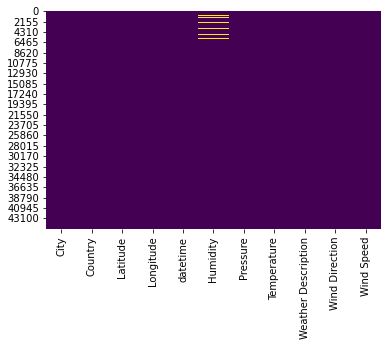

In [12]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

We can see that there are missing values only in humidity and pressure. 

# 6.Replacing the missing values

In [13]:
#filling missing values with next rows data
df.head()
df1=df.fillna(method='bfill')
df1


,City,Country,Latitude,Longitude,datetime,Humidity,Pressure,Temperature,Weather Description,Wind Direction,Wind Speed
0,Detroit,United States,42.331429,-83.045753,2012-10-01 12:00:00,76.0,1016.0,284.030000,sky is clear,0.0,0.0
1,Detroit,United States,42.331429,-83.045753,2012-10-01 13:00:00,76.0,1016.0,284.030000,sky is clear,0.0,0.0
2,Detroit,United States,42.331429,-83.045753,2012-10-01 14:00:00,75.0,1015.0,284.069789,sky is clear,0.0,0.0
3,Detroit,United States,42.331429,-83.045753,2012-10-01 15:00:00,75.0,1015.0,284.173965,sky is clear,0.0,0.0
4,Detroit,United States,42.331429,-83.045753,2012-10-01 16:00:00,74.0,1015.0,284.278140,sky is clear,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
45248,Detroit,United States,42.331429,-83.045753,2017-11-29 20:00:00,39.0,1027.0,281.250000,sky is clear,50.0,1.0
45249,Detroit,United States,42.331429,-83.045753,2017-11-29 21:00:00,39.0,1027.0,281.050000,sky is clear,70.0,2.0
45250,Detroit,United States,42.331429,-83.045753,2017-11-29 22:00:00,42.0,1027.0,280.170000,sky is clear,90.0,3.0
45251,Detroit,United States,42.331429,-83.045753,2017-11-29 23:00:00,52.0,1027.0,278.060000,sky is clear,110.0,1.0


In [14]:
df1.isnull().sum().sum()

0

In [15]:
#Removing unnecessary columns
df2=df1.drop(['Latitude','Longitude'],axis=1)
df2.head()

,City,Country,datetime,Humidity,Pressure,Temperature,Weather Description,Wind Direction,Wind Speed
0,Detroit,United States,2012-10-01 12:00:00,76.0,1016.0,284.030000,sky is clear,0.0,0.0
1,Detroit,United States,2012-10-01 13:00:00,76.0,1016.0,284.030000,sky is clear,0.0,0.0
2,Detroit,United States,2012-10-01 14:00:00,75.0,1015.0,284.069789,sky is clear,0.0,0.0
3,Detroit,United States,2012-10-01 15:00:00,75.0,1015.0,284.173965,sky is clear,0.0,0.0
4,Detroit,United States,2012-10-01 16:00:00,74.0,1015.0,284.278140,sky is clear,0.0,0.0


# 7. Relationship analysis

<AxesSubplot:>

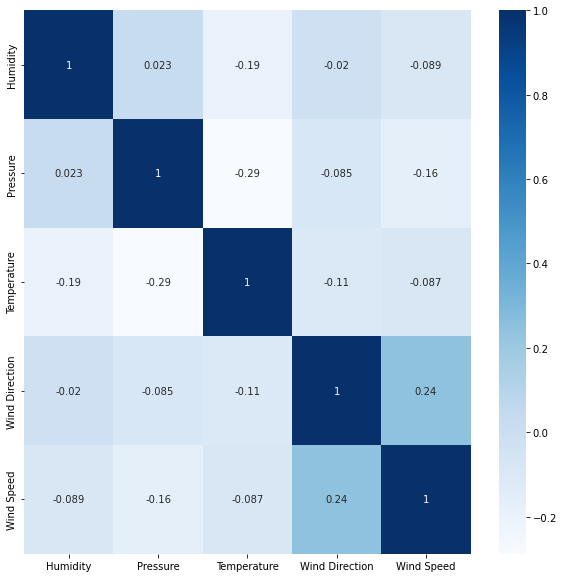

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),cbar=True,annot=True,cmap='Blues')

Using pairplot

In [17]:
df2.corr()

,Humidity,Pressure,Temperature,Wind Direction,Wind Speed
Humidity,1.000000,0.022649,-0.194352,-0.020124,-0.088883
Pressure,0.022649,1.000000,-0.288258,-0.085055,-0.163539
Temperature,-0.194352,-0.288258,1.000000,-0.107020,-0.087475
Wind Direction,-0.020124,-0.085055,-0.107020,1.000000,0.241555
Wind Speed,-0.088883,-0.163539,-0.087475,0.241555,1.000000


<AxesSubplot:>

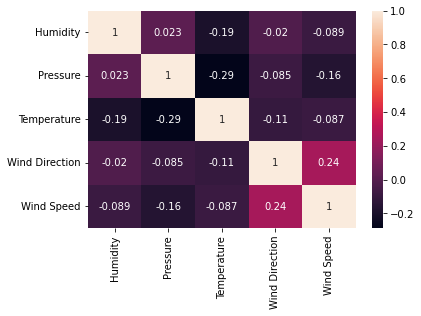

In [18]:
correlation=df2.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

# 8. Pair plots

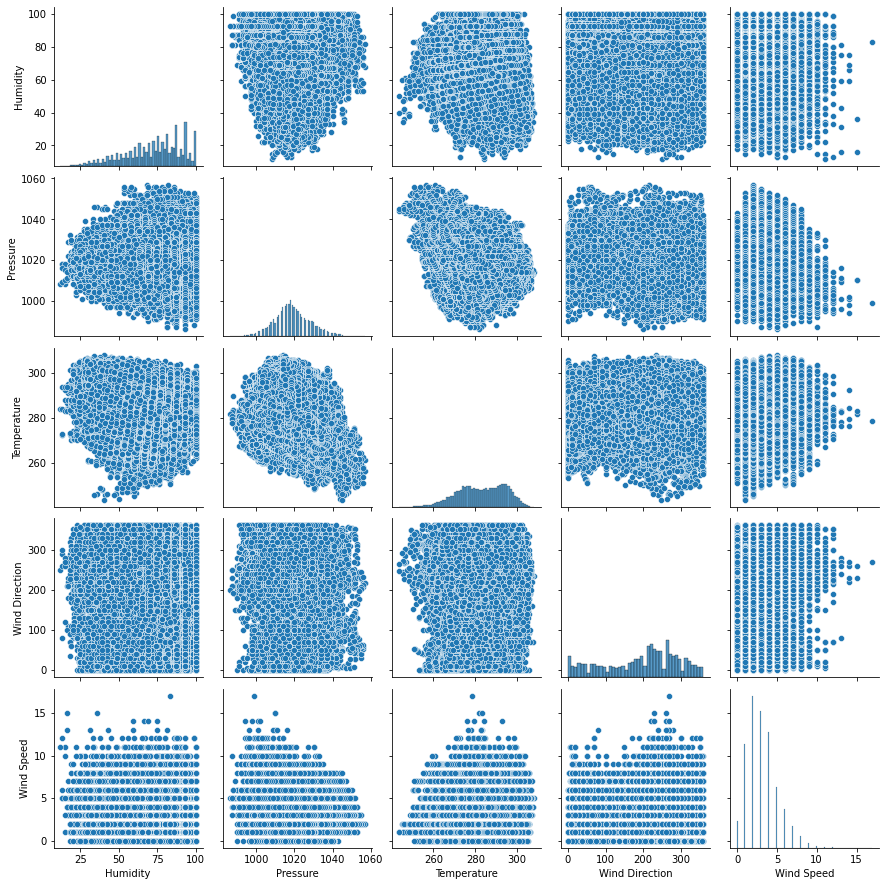

In [19]:
sns.pairplot(df2)

# 9. Scatter plots

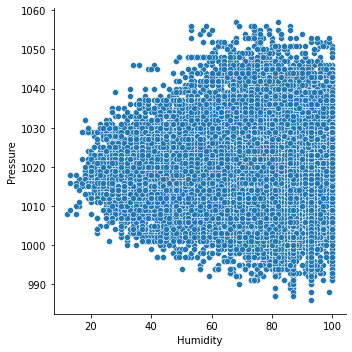

In [20]:
sns.relplot(x='Humidity',y='Pressure',data=df2)

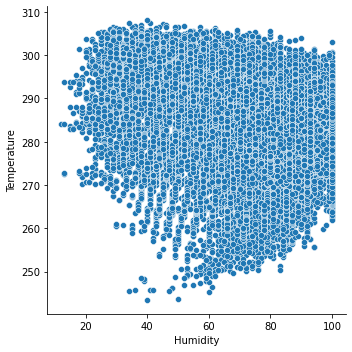

In [21]:
sns.relplot(x='Humidity',y='Temperature',data=df2)

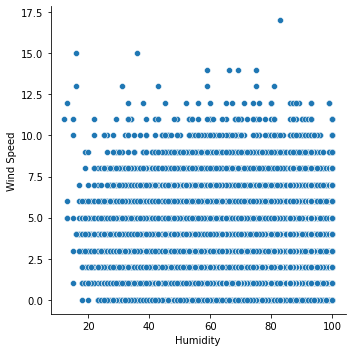

In [22]:
sns.relplot(x='Humidity',y='Wind Speed',data=df2)

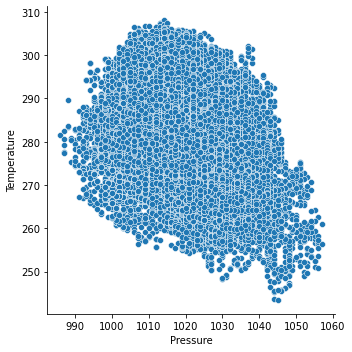

In [23]:
sns.relplot(x='Pressure',y='Temperature',data=df2)

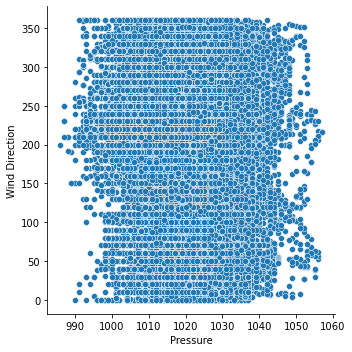

In [24]:
sns.relplot(x='Pressure',y='Wind Direction',data=df2)

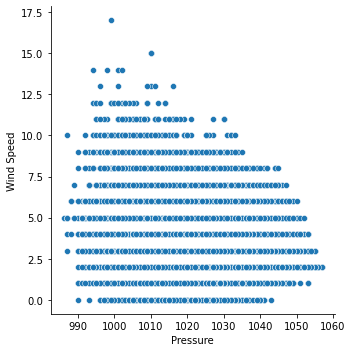

In [25]:
sns.relplot(x='Pressure',y='Wind Speed',data=df2)

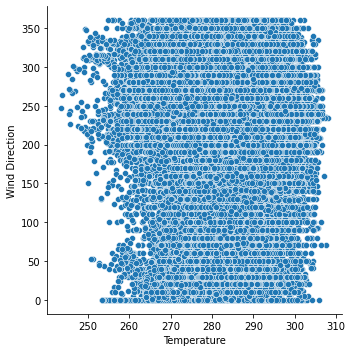

In [26]:
sns.relplot(x='Temperature',y='Wind Direction',data=df2)

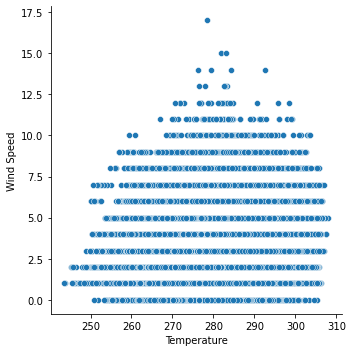

In [27]:
sns.relplot(x='Temperature',y='Wind Speed',data=df2)

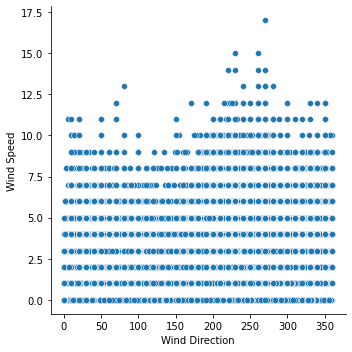

In [28]:
sns.relplot(x='Wind Direction',y='Wind Speed',data=df2)

# 10. Histogram Plots

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

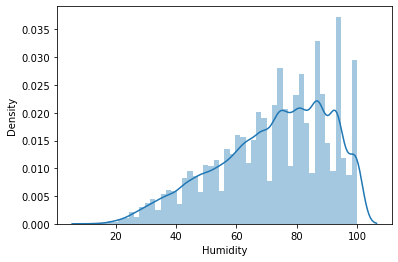

In [29]:
sns.distplot(df2['Humidity'])

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure', ylabel='Density'>

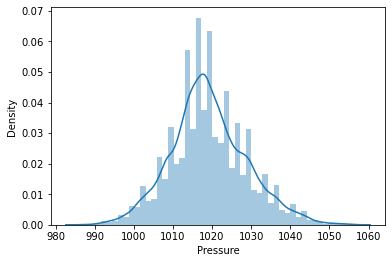

In [30]:
sns.distplot(df2['Pressure'])

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

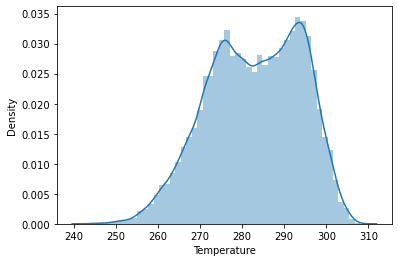

In [31]:
sns.distplot(df2['Temperature'])

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind Direction', ylabel='Density'>

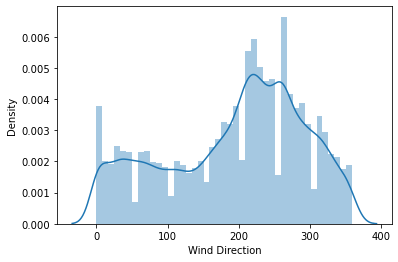

In [32]:
sns.distplot(df2['Wind Direction'])

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind Speed', ylabel='Density'>

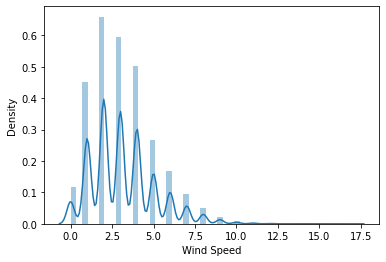

In [33]:
sns.distplot(df2['Wind Speed'])

# 11. Box Plot

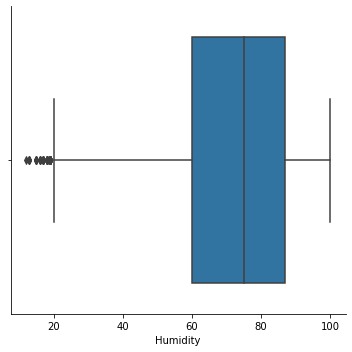

In [34]:
sns.catplot(x='Humidity',kind='box',data=df2)

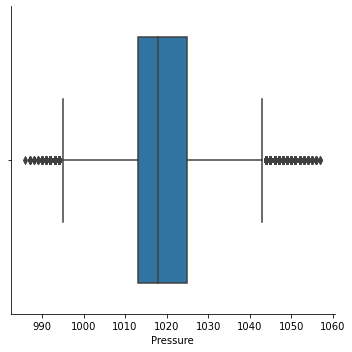

In [35]:
sns.catplot(x='Pressure',kind='box',data=df2)

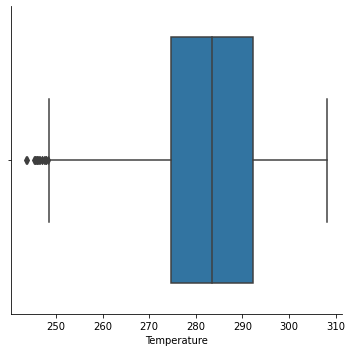

In [36]:
sns.catplot(x='Temperature',kind='box',data=df2)

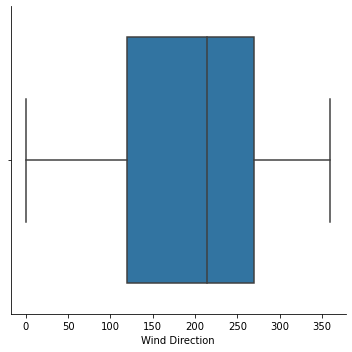

In [37]:
sns.catplot(x='Wind Direction',kind='box',data=df2)

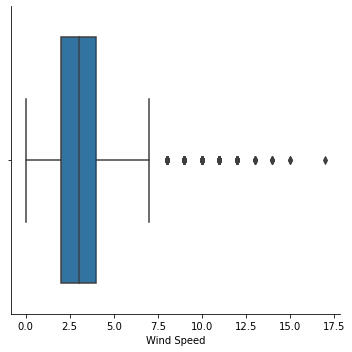

In [38]:
sns.catplot(x='Wind Speed',kind='box',data=df2)